In [2]:
import numpy as np

# Mean Sqaurred Error

In [3]:
y = np.array([50,60,70,40,20,15,75,85,12,89],dtype=np.float32)
y_predicted = np.array([41.2,65,52.8,40.9,20,12.6,70.8,72.9,5.6,82.5],dtype=np.float32)
print(y.size,y_predicted.size)

10 10


In [4]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(y_true=y,
                           y_pred=y_predicted)

print(error)

65.21099853515625


In [5]:
def MSE(y_true,y_pred):
    n = y_true.size
    error = 0
    for i in range(n):
        error += (y_true[i] - y_pred[i])**2
    error /= n
    return np.array(error,dtype=np.float64)

In [9]:
def MSE_vector(y_true,y_pred):
    n = y_true.size
    error = y_true-y_pred
    error = error ** 2
    error = error.sum()
    error = error / n
    #or with just one line: return np.sum(np.square(y_pred-y_true)) / y_true.size
    return np.array(error,dtype=np.float64)

In [10]:
error = MSE(y_true=y,y_pred=y_predicted)
error_2 = MSE_vector(y_true=y, y_pred=y_predicted)
print(error)
print(error_2)

65.21099853515625
65.21099853515625


# Huber Loss - Smooth L1

In [3]:
y = np.array([10,20,30])
y_hat = np.array([15,18,40])

In [4]:
def huber_loss(y_pred, y_true, delta=1.0):
    loss = 0.0
    for i in range(y_pred.shape[0]):
        error = y_pred[i] - y_true[i]
        if abs(error) <= delta:
            loss += 0.5 * (error ** 2)
        else:
            loss += delta * (abs(error) - 0.5 * delta)
    return loss / y_pred.shape[0]

In [8]:
huber_loss(y,y_hat,delta=4)

np.float64(15.333333333333334)

In [11]:
def smooth_l1_loss(y_true, y_pred, beta=1.0):
    diff = np.abs(y_true - y_pred)
    loss = np.where(
        diff < beta,
        0.5 * (diff ** 2) / beta,
        diff - 0.5 * beta
    )
    print(loss)
    return np.mean(loss)

In [12]:
smooth_l1_loss(y,y_hat,beta=5)

[2.5 0.4 7.5]


np.float64(3.466666666666667)

# Linear Regression Prediction

In [3]:
w = 5
b = 10
inputs = np.array([5,10,15,20],dtype=np.float32)

In [4]:
def predict(inputs,w=0,b=0):
    output = w * inputs + b
    return output
predict(inputs,w,b)

array([ 35.,  60.,  85., 110.], dtype=float32)

In [6]:
x =  np.array([[1,2,3],[4,5,6],[-1,-2,-3],[-4,-5,-6]])
w = np.array([[1],[2],[3]])
print(x.shape,w.shape)
print(np.matmul(x,w))

(4, 3) (3, 1)
[[ 14]
 [ 32]
 [-14]
 [-32]]


# Linear Regression - Gradient Descent

In [15]:
x = np.random.random((1000,5))*10
weights = np.array([[1],[2],[3],[4],[5]]) #Burası normalde bilinmez!!!
y = np.matmul(x,weights)

## Iterative

In [20]:
# For loop ile
def linear_regression_fit_for(input,output,alpha=0.1,iter=10):
    m = input.shape[1] #5
    n = input.shape[0] #1000
    w = np.random.random((m,1)) #5x1
    print(w)
    #print("w:",w)
    print(f"input shape:{input.shape}\noutput shape: {output.shape}\nw shape: {w.shape}")
    for i in range(iter):
        prediction = np.matmul(input,w)
        error = (output - prediction).flatten()
        for j in range(m):
            grad_vec = input[:,j] * error
            grad = grad_vec.sum()
            w[j,0] += (2 * alpha * grad)/n
    return w

In [21]:
w = linear_regression_fit_for(x,y,0.001,10000)
print(w)

[[0.39904211]
 [0.17239073]
 [0.15078575]
 [0.71920645]
 [0.32194602]]
input shape:(1000, 5)
output shape: (1000, 1)
w shape: (5, 1)
[[1.]
 [2.]
 [3.]
 [4.]
 [5.]]


## Matrix

In [16]:
# Matrix ile
def linear_regression_fit(input,output,alpha=0.1,iter=10):
    m = input.shape[1] #5
    n = input.shape[0] #1000
    w = np.random.random((m,1)) #5x1
    #print("w:",w)
    print(f"input shape:{input.shape}\noutput shape: {output.shape}\nw shape: {w.shape}")
    for _ in range(iter):
        pred = np.matmul(input, w)
        error = output - pred
        gradient_w = -2 * np.matmul(input.T, error) / n

        w -= alpha * gradient_w

    return w

In [24]:
w = linear_regression_fit(x,y,alpha=0.001,iter=5000)
print(w)

input shape:(1000, 5)
output shape: (1000, 1)
w shape: (5, 1)
[[1.]
 [2.]
 [3.]
 [4.]
 [5.]]


## With sklearn

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
print(model.coef_)

[[1. 2. 3. 4. 5.]]


In [9]:
new_data = np.array([[1,2,3,4,5]])
print(model.predict(new_data))
print(np.matmul(new_data,w))

[[55.]]
[[55.]]


# Normal Equation

In [28]:
x = np.random.random((1000,5))*10
weights = np.array([[1],[2],[3],[4],[5]]) #Burası normalde bilinmez!!!
y = np.matmul(x,weights)

In [29]:
def normal_equation(x,y):
    first_part = np.linalg.inv(np.matmul(x.T,x))
    second_part = np.matmul(x.T,y)
    weights = np.matmul(first_part,second_part)
    return weights

In [30]:
w = normal_equation(x,y)
print(w)

[[1.]
 [2.]
 [3.]
 [4.]
 [5.]]


# Binary Cross Entropy

In [7]:
y_true = np.array([1,1,0])
y_pred = np.array([0.9,0.7,0.3])

In [8]:
def bce(y_true,y_pred):
    n = y_true.shape[0]
    part_1 = y_true*np.log(y_pred)
    part_2 = (1-y_true)*np.log(1-y_pred)
    bce = - np.sum(part_1+part_2) / n
    return bce

In [9]:
bce(y_true,y_pred)

np.float64(0.27290346784509706)

# Sigmoid

In [15]:
def sigmoid(z):
    y = 1/(1+np.exp(-z))
    return y

# Logistic Regression Prediction

In [16]:
def log_reg_predict(w,b,input):
    z = w*input + b
    y = sigmoid(z)
    return y

In [17]:
log_reg_predict(2,1,0.5)

np.float64(0.8807970779778823)

# Logistic Regression - Gradient Descent

## Grafik fonksiyonu - Data

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_logistic_regression_line(X, y, w, b):
    """
    X: (n, 2) numpy array (2 feature)
    y: (n, 1) veya (n,) numpy array
    w: (2, 1) weight vector
    b: scalar bias
    """

    # y düzleştirme
    if y.ndim > 1:
        y = y.flatten()

    # Verileri çiz
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Sınıf 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Sınıf 1')

    # Karar sınırı çizgisi: w1*x1 + w2*x2 + b = 0  =>  x2 = -(w1*x1 + b)/w2
    x1_vals = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
    w1, w2 = w[0, 0], w[1, 0]
    if w2 != 0:
        x2_vals = -(w1 * x1_vals + b) / w2
        plt.plot(x1_vals, x2_vals, 'k--', label='Karar Sınırı')
    else:
        plt.axvline(x=-b / w1, color='k', linestyle='--', label='Karar Sınırı (dikey)')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Logistic Regression Sınıflandırması")
    plt.legend()
    plt.grid(True)
    plt.show()

In [12]:
import numpy as np
true_weights = np.array([[1.2], [-0.8]])
x = np.random.randn(1000, 2)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
z = x @ true_weights
y_prob = sigmoid(z)
y = (y_prob > 0.5).astype(int)

## Iterative

In [13]:
def logistic_regression_model(x,y,alpha=0.01,iter=100):
    n = x.shape[0]
    m = x.shape[1]
    w = np.random.random((m,1))
    print(f"input shape:{x.shape}\noutput shape: {y.shape}\nw shape: {w.shape}")
    for i in range(iter):
        z = np.matmul(x,w)
        pred = 1 / (1 + np.exp(-z))
        error = (pred - y)
        for j in range(m):
            grad_vec = x[:,j] * error.flatten()
            grad = grad_vec.sum()
            w[j,0] -= (alpha * grad)/n
    return w

In [14]:
w_iter = logistic_regression_model(x,y,0.001,10000)
w_iter

input shape:(1000, 2)
output shape: (1000, 1)
w shape: (2, 1)


array([[ 1.57008027],
       [-0.87472433]])

## Matrix

In [15]:
def logistic_regression_model_matrix(x,y,alpha=0.01,iter=100):
    n = x.shape[0]
    m = x.shape[1]
    w = np.random.random((m,1))
    print(f"input shape:{x.shape}\noutput shape: {y.shape}\nw shape: {w.shape}")
    for i in range(iter):
        z = np.matmul(x,w)
        pred = 1 / (1 + np.exp(-z))
        error = (pred - y)
        grad = np.matmul(x.T,error)
        w -= alpha * grad / n
        
    return w

In [16]:
w_matrix = logistic_regression_model_matrix(x,y,0.0001,50000)
w_matrix

input shape:(1000, 2)
output shape: (1000, 1)
w shape: (2, 1)


array([[ 1.39655014],
       [-0.66191521]])

## With sklearn

In [164]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept=False)
model.fit(x,y.flatten())
w_sklearn = model.coef_
w_sklearn

array([[ 7.09088245, -4.7013614 ]])

## Results

In [ ]:
plot_logistic_regression_line(x,y,w_iter,0)

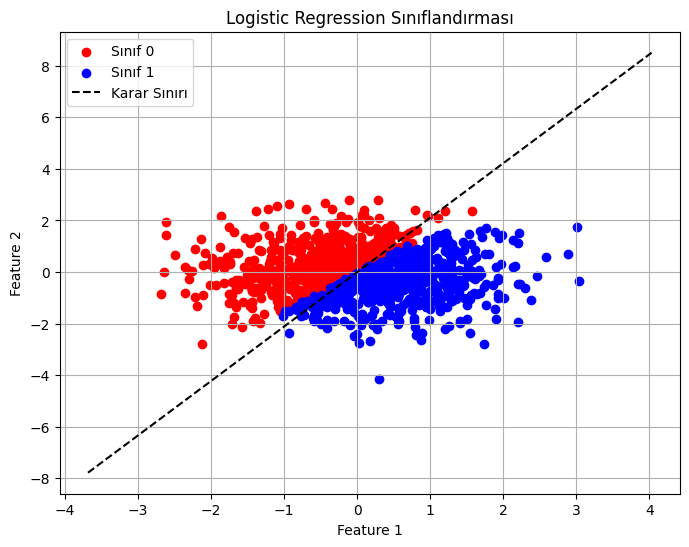

In [17]:
plot_logistic_regression_line(x,y,w_matrix,0)

In [ ]:
plot_logistic_regression_line(x,y,w_sklearn.reshape(2,1),0)